# PCA from Scratch

Datos originales:
    A  B  C  D
0  2  0  1  3
1  4  0  2  6
2  3  1  3  5
3  5  2  4  8
4  4  1  2  7
5  6  2  5  9

Datos estandarizados:
           A         B         C         D
0 -1.414214 -1.118034 -1.245505 -1.543033
1  0.000000 -1.118034 -0.566139 -0.154303
2 -0.707107  0.000000  0.113228 -0.617213
3  0.707107  1.118034  0.792594  0.771517
4  0.000000  0.000000 -0.566139  0.308607
5  1.414214  1.118034  1.471960  1.234427

Matriz de covarianza:
 [[1.         0.79056942 0.86469203 0.98198051]
 [0.79056942 1.         0.91146543 0.82807867]
 [0.86469203 0.91146543 1.         0.83862787]
 [0.98198051 0.82807867 0.83862787 1.        ]]

Eigenvalores:
 [3.60834503 0.29000019 0.09608052 0.00557426]

Eigenvectores (columnas):
 [[ 0.5045614   0.51104992 -0.18024273  0.6721297 ]
 [ 0.48853849 -0.60612729  0.57628608  0.24866483]
 [ 0.50068051 -0.39374492 -0.72203207 -0.27009934]
 [ 0.5060306   0.46519095  0.33775227 -0.64300374]]

Porcentaje de varianza explicada por cada componente:
 [

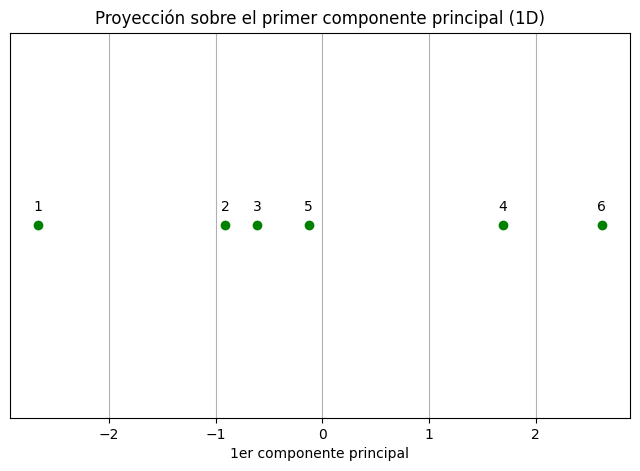

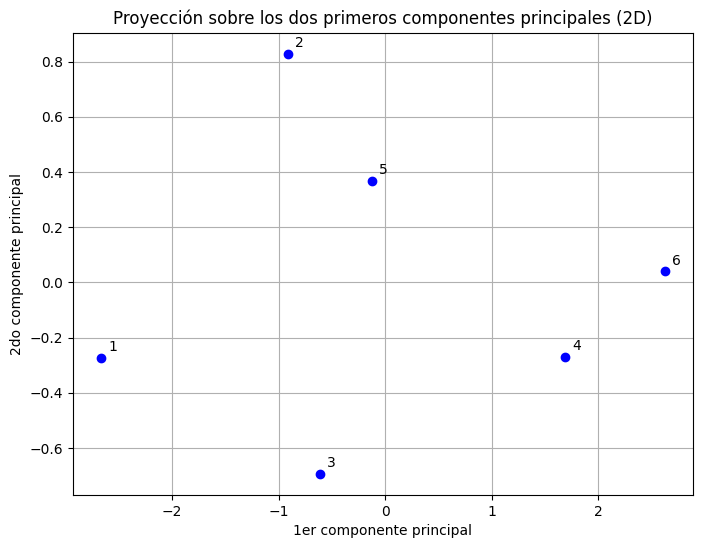

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.array([
    [2, 0, 1, 3],
    [4, 0, 2, 6],
    [3, 1, 3, 5],
    [5, 2, 4, 8],
    [4, 1, 2, 7],
    [6, 2, 5, 9]
])

column_names = ['A', 'B', 'C', 'D']
df = pd.DataFrame(data, columns=column_names)
print("Datos originales:\n", df)

# Centrar y estandarizar
means = df.mean()
stds = df.std(ddof=1)

data_centered = df - means
data_standardized = (df - means) / stds

print("\nDatos estandarizados:\n", data_standardized)

# Calcular matriz de covarianza de los datos estandarizados
cov_matrix = np.cov(data_standardized.T)
print("\nMatriz de covarianza:\n", cov_matrix)

# Calcular eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar eigenvalores y eigenvectores de mayor a menor
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\nEigenvalores:\n", eigenvalues)
print("\nEigenvectores (columnas):\n", eigenvectors)

# Porcentaje de varianza explicada
var_exp = eigenvalues / eigenvalues.sum()
print("\nPorcentaje de varianza explicada por cada componente:\n", var_exp)

# Proyectar datos sobre el primer componente (1D)
projection_1d = data_standardized.values @ eigenvectors[:, 0]

# Proyectar datos sobre los dos primeros componentes (2D)
projection_2d = data_standardized.values @ eigenvectors[:, :2]
projection_2d = np.array(projection_2d)

# Gráfico: Proyección 1D
plt.figure(figsize=(8, 5))
plt.scatter(projection_1d, np.zeros_like(projection_1d), color='green')
for i, txt in enumerate(range(1, 7)):
    plt.annotate(txt, (projection_1d[i], 0), textcoords="offset points", xytext=(0,10), ha='center')
plt.title("Proyección sobre el primer componente principal (1D)")
plt.xlabel("1er componente principal")
plt.yticks([])
plt.grid(True)
plt.show()

# Gráfico: Proyección 2D
plt.figure(figsize=(8, 6))
plt.scatter(projection_2d[:, 0], projection_2d[:, 1], color='blue')
for i, txt in enumerate(range(1, 7)):
    plt.annotate(txt, (projection_2d[i, 0], projection_2d[i, 1]), textcoords="offset points", xytext=(5,5))
plt.title("Proyección sobre los dos primeros componentes principales (2D)")
plt.xlabel("1er componente principal")
plt.ylabel("2do componente principal")
plt.grid(True)
plt.show()